In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
print('x_train:' , x_train.shape)
H=200#no of hidden layers
K = len(np.unique(y_train)) # Classes
Ntr = x_train.shape[0]
Nte = x_test.shape[0]
Din = 3072 # CIFAR10
# Din = 784 # MINIST
# Normalize pixel values
x_train,x_test=x_train/255.0,x_test/255.0

mean_image = np.mean(x_train, axis=0)
x_train = x_train - mean_image
x_test = x_test - mean_image

y_train = tf.keras.utils.to_categorical(y_train, num_classes=K)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=K)


x_train: (50000, 32, 32, 3)


In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D,Flatten,Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.regularizers import l2

model = Sequential()
model.add(Conv2D(32, (3, 3),kernel_regularizer=l2(0.004),bias_regularizer=l2(0.002), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3),kernel_regularizer=l2(0.004),bias_regularizer=l2(0.002), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3),kernel_regularizer=l2(0.004),bias_regularizer=l2(0.002), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(64,kernel_regularizer=l2(0.004),bias_regularizer=l2(0.002), activation='relu'))
model.add(Dense(10,kernel_regularizer=l2(0.004),bias_regularizer=l2(0.002), activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 2, 2, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 256)               0

In [3]:
sgd = SGD(lr=0.01, decay=1e-7, momentum=0.8)
model.compile(loss='categorical_crossentropy', optimizer=sgd,metrics=['accuracy'])
fitting=model.fit(x_train, y_train, batch_size=50, epochs=50,validation_data=(x_test, y_test))

Epoch 1/50
1000/1000 [==============================] - 42s 42ms/step - loss: 2.5558 - accuracy: 0.3208 - val_loss: 2.0836 - val_accuracy: 0.4287
Epoch 2/50
1000/1000 [==============================] - 44s 44ms/step - loss: 1.9427 - accuracy: 0.4468 - val_loss: 1.8072 - val_accuracy: 0.4687
Epoch 3/50
1000/1000 [==============================] - 44s 44ms/step - loss: 1.7181 - accuracy: 0.4995 - val_loss: 1.6564 - val_accuracy: 0.5041
Epoch 4/50
1000/1000 [==============================] - 44s 44ms/step - loss: 1.6067 - accuracy: 0.5329 - val_loss: 1.5604 - val_accuracy: 0.5460
Epoch 5/50
1000/1000 [==============================] - 44s 44ms/step - loss: 1.5397 - accuracy: 0.5567 - val_loss: 1.5288 - val_accuracy: 0.5635
Epoch 6/50
1000/1000 [==============================] - 44s 44ms/step - loss: 1.5058 - accuracy: 0.5756 - val_loss: 1.5042 - val_accuracy: 0.5825
Epoch 7/50
1000/1000 [==============================] - 44s 44ms/step - loss: 1.4818 - accuracy: 0.5897 - val_loss: 1.4548 -

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


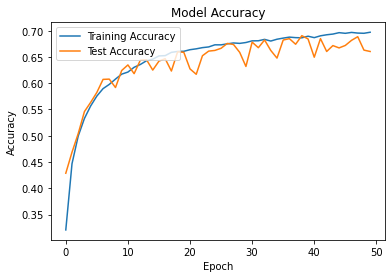

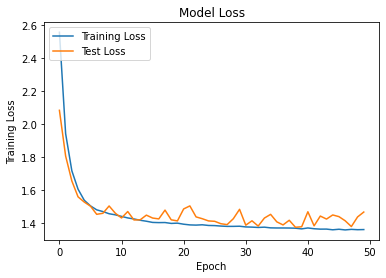

In [4]:
print(fitting.history.keys())
plt.plot(fitting.history['accuracy'])
plt.plot(fitting.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training Accuracy', 'Test Accuracy'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(fitting.history['loss'])
plt.plot(fitting.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Training Loss')
plt.xlabel('Epoch')
plt.legend(['Training Loss', 'Test Loss'], loc='upper left')
plt.show()